In [2]:
import os
from utils import *
from align_and_merge import *
import matplotlib.pyplot as plt
import time
from main import *
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import cv2

%load_ext autoreload
%autoreload 2

In [3]:
image_name = "c1b1_20150226_144326_422"
raw_images = load_raw_images_parallel(image_name)
ref_image_index = select_reference_image(raw_images)

In [4]:
print("Reference image index:", ref_image_index)

Reference image index: 0


## Dense Motion and No Parallel

In [5]:
downsampled_raw_images = np.array([gaussian_downsample(raw_image, 2) for raw_image in raw_images])
print("downsampled raw images with shape: ", downsampled_raw_images[0].shape, "previous shape: ", raw_images[0].shape)

downsampled raw images with shape:  (1232, 1640) previous shape:  (2464, 3280)


In [22]:
# Generate alignment matrix using pyramid block matching
start = time.time()
reference_motion_matrix = burst_align(ref_image_index, downsampled_raw_images, parallel=False)
print("Time taken for parallel alignment: ", time.time() - start)

pyramid shapes:  [(19, 25), (77, 102), (308, 410), (1232, 1640)]


100%|██████████| 10/10 [00:37<00:00,  3.75s/it]

Time taken for parallel alignment:  40.67095351219177


## Dense Motion and Parallel

In [21]:
# Generate alignment matrix using pyramid block matching
start = time.time()
reference_motion_matrix = burst_align(ref_image_index, downsampled_raw_images, parallel=True)
print("Time taken for parallel alignment: ", time.time() - start)

pyramid shapes:  [(19, 25), (77, 102), (308, 410), (1232, 1640)]
Time taken for parallel alignment:  9.000220775604248


## Sparse Motion and Parallel

In [23]:
start = time.time()
sparse_motion_matrix = parallel_sparse_burst_align(ref_image_index, raw_images)
print("Time taken for parallel sparse alignment: ", time.time() - start)

Time taken for parallel sparse alignment:  9.721559047698975


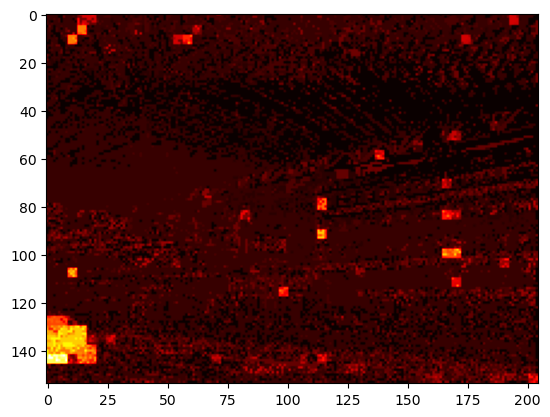

In [10]:
plt.imshow(np.linalg.norm(sparse_motion_matrix[1, :, :, :2], axis=-1), cmap='hot')

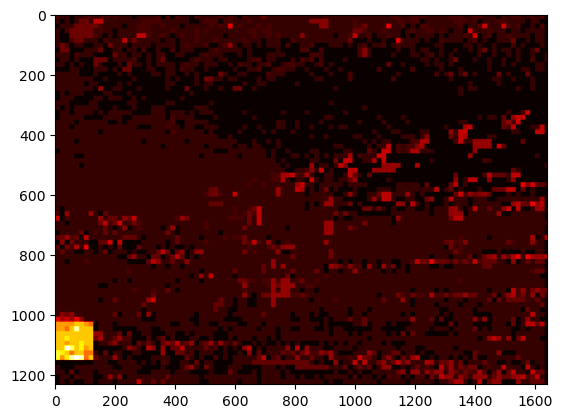

In [24]:
plt.imshow(np.linalg.norm(reference_motion_matrix[1, :, :, :2], axis=-1), cmap='hot')

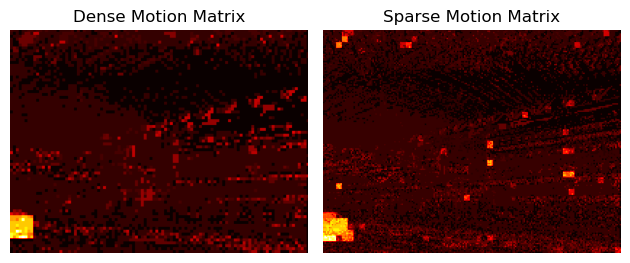

In [25]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(1, 2)

# Plot the first image
ax[1].imshow(np.linalg.norm(sparse_motion_matrix[1, :, :, :2], axis=-1), cmap='hot')
ax[1].set_title('Sparse Motion Matrix')

# Plot the second image
ax[0].imshow(np.linalg.norm(reference_motion_matrix[1, :, :, :2], axis=-1), cmap='hot')
ax[0].set_title('Dense Motion Matrix')

# Remove the axis labels
for a in ax:
    a.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the plot
plt.savefig('./paper_illustrations/motion_matrix_comparison.png')